# What is IForest behavior according to the dataset dimension size?

## Test with 1 dimension dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from matplotlib.mlab import frange
import statistics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from imblearn.metrics import specificity_score
from imblearn.metrics import sensitivity_score
import matplotlib.cm as cm
from mpl_toolkits import mplot3d
from imblearn.metrics import specificity_score
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

Using TensorFlow backend.


## Generals settings

In [2]:
datasets_path = '/Users/thesard/Doctorat/These2018/ISEP/Developpements/AnacondaWorkSpace/LearningPython/datasets/'

## Chargement du jeu de données

Le jeu de données artificiel généré suivant une distribution gaussienne.
Il s'agit d'un jeu de données univarié ou unidimensionnel contenant des données normales et anormales.
Les données normales suivent une distribution gaussienne de paramètres mu = 0 et sigma = 1.
Les données anormales suivent une distribution gaussienne de paramètres mu = 5 et de sigma = 1.

In [3]:
dataset_path = datasets_path+"synthetic_1D_data/synthetic_1D_data_2019-12-17 10:43:50.547607.csv"
dataset_brut = pd.read_csv(dataset_path, header=None, index_col=None)
dataset_number_dimension = len(dataset_brut.columns)
if dataset_number_dimension-2 == 0:
    X_brut_brut = dataset_brut[0]
elif dataset_number_dimension-2 > 0:
    X_brut_brut = dataset_brut[[0,dataset_number_dimension-2]]
else:
    print("There is an error in the dataset you uploaded. It have to have at least 2 columns.")
X_brut = pd.DataFrame(X_brut_brut)
y_brut = dataset_brut[dataset_number_dimension-1]
#y_brut = pd.DataFrame(y_brut_brut)
dataset_brut.describe()

,0
count,1516.000000
mean,0.032098
std,1.107025
min,-3.334118
25%,-0.692580
50%,-0.034028
75%,0.649778
max,6.867883


In [4]:
dataset_brut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516 entries, 0 to 1515
Data columns (total 2 columns):
0    1516 non-null float64
1    1516 non-null object
dtypes: float64(1), object(1)
memory usage: 23.8+ KB


In [5]:
abnormals_data = np.where(dataset_brut[dataset_number_dimension-1]=='0')
abnormals_data

(array([1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511,
        1512, 1513, 1514, 1515]),)

## Transformation de la classe à expliquer

L'objectif ici est de remplacer les "0" par -1 et les "1" par 1 afin de faire les matrices de confusion avec la fonction dédiée de scikit-learn.

In [6]:
y_transform = y_brut
y_transform = np.where(y_transform=='0',-1,1)
y_transform

array([ 1,  1,  1, ..., -1, -1, -1])

## Execution of IForest on the dataset to see the high performance possible

In [7]:
specificities =[]
roc_aucs = []
# Instanciation, fit and predict on Shuttle
GENE_func_IF = IsolationForest(behaviour="new")
GENE_func_IF.fit(X_brut)
GENE_y_pred_IF = GENE_func_IF.predict(X_brut)
#print(GENE_y_pred_IF)
# Calcul de l'aire sous la courbe ROC
y_DF_IF = GENE_func_IF.decision_function(X_brut)

# Matrice de confusion
#ttn, tfp, tfn, ttp = confusion_matrix(y_transform_Shuttle, MS_y_pred_IF_Shuttle).ravel()
print(confusion_matrix(y_transform, GENE_y_pred_IF))
#ROC AUC
roc_aucs.append(roc_auc_score(y_transform, y_DF_IF))
# Specificity
specificities.append(specificity_score(y_transform, GENE_y_pred_IF))
print("ROC AUC")
print(roc_aucs)
print("Specificities")
print(specificities)
min_roc_auc = max(roc_aucs)
print("min_roc_auc = "+str(min_roc_auc))

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


[[  15    0]
 [ 137 1364]]
ROC AUC
[0.9999111703308905]
Specificities
[1.0]
min_roc_auc = 0.9999111703308905


In [8]:
CONT_executions_time_IF_Shuttle = []
CONT_roc_auc_IF_Shuttle = []
CONT_precisions_IF_Shuttle = []
CONT_recalls_IF_Shuttle = []
CONT_f1_scores_IF_Shuttle = []
CONT_tn_IF_Shuttle = []
CONT_fp_IF_Shuttle = []
CONT_fn_IF_Shuttle = []
CONT_tp_IF_Shuttle = []
CONT_specificity_IF_Shuttle = []
CONT_contamination_IF_Shuttle = []

for j in np.arange(0., 0.5, 0.01):
    print("contamination = "+str(j))
    contamination = j
    CONT_contamination_IF_Shuttle.append(j)
    start_IF_Shuttle = time()
        
    # Instanciation, fit and predict on Shuttle
    CONT_func_IF_Shuttle = IsolationForest(contamination=contamination, behaviour="new")
    CONT_func_IF_Shuttle.fit(X_brut)
    CONT_y_pred_IF_Shuttle = CONT_func_IF_Shuttle.predict(X_brut)

    # Calcul du temps d'exécution
    CONT_exec_time_IF_Shuttle = time() - start_IF_Shuttle
    CONT_executions_time_IF_Shuttle.append(CONT_exec_time_IF_Shuttle)
    
    # Precision
    CONT_precisions_IF_Shuttle.append(precision_score(y_transform, CONT_y_pred_IF_Shuttle))
    
    # Recall
    CONT_recalls_IF_Shuttle.append(recall_score(y_transform, CONT_y_pred_IF_Shuttle))
    
    # f1_score
    CONT_f1_scores_IF_Shuttle.append(f1_score(y_transform, CONT_y_pred_IF_Shuttle))
    
    # Specificity
    CONT_specificity_IF_Shuttle.append(specificity_score(y_transform, CONT_y_pred_IF_Shuttle))
    
    # Matrice de confusion
    ttn, tfp, tfn, ttp = confusion_matrix(y_transform, CONT_y_pred_IF_Shuttle).ravel()
    tn = ttp
    fp = tfn
    fn = tfp
    tp = ttn
    CONT_tn_IF_Shuttle.append(tn)
    CONT_fp_IF_Shuttle.append(fp)
    CONT_fn_IF_Shuttle.append(fn)
    CONT_tp_IF_Shuttle.append(tp)
    
    # Calcul de l'aire sous la courbe ROC
    CONT_y_DF_IF_Shuttle = CONT_func_IF_Shuttle.decision_function(X_brut)
    CONT_auc_IF_Shuttle = roc_auc_score(y_transform, CONT_y_DF_IF_Shuttle)
    CONT_roc_auc_IF_Shuttle.append(CONT_auc_IF_Shuttle)

contamination = 0.0
contamination = 0.01
contamination = 0.02
contamination = 0.03
contamination = 0.04
contamination = 0.05
contamination = 0.06
contamination = 0.07
contamination = 0.08
contamination = 0.09
contamination = 0.1
contamination = 0.11
contamination = 0.12
contamination = 0.13
contamination = 0.14
contamination = 0.15
contamination = 0.16
contamination = 0.17
contamination = 0.18
contamination = 0.19
contamination = 0.2
contamination = 0.21
contamination = 0.22
contamination = 0.23
contamination = 0.24
contamination = 0.25
contamination = 0.26
contamination = 0.27
contamination = 0.28
contamination = 0.29
contamination = 0.3
contamination = 0.31
contamination = 0.32
contamination = 0.33
contamination = 0.34
contamination = 0.35000000000000003
contamination = 0.36
contamination = 0.37
contamination = 0.38
contamination = 0.39
contamination = 0.4
contamination = 0.41000000000000003
contamination = 0.42
contamination = 0.43
contamination = 0.44
contamination = 0.45
contamina

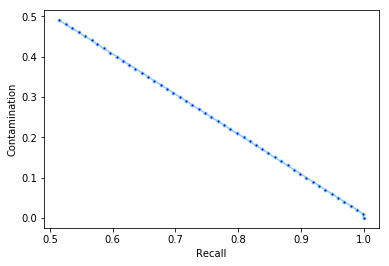

In [9]:
plt.plot(CONT_recalls_IF_Shuttle, np.arange(0., 0.5, 0.01),  "g-", marker='.', markerfacecolor='blue', markersize=6, color='skyblue')
plt.xlabel('Recall')
plt.ylabel('Contamination')
#plt.title("Execution time of IsolationForest applied on Shuttle (in second)")
#plt.legend(loc="best")
#plt.savefig('contamination_cputime.png')
plt.show()

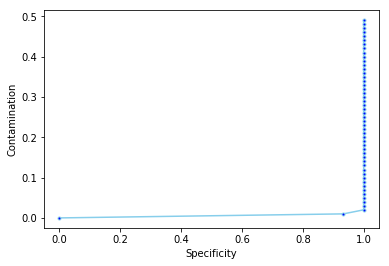

In [10]:
plt.plot(CONT_specificity_IF_Shuttle, np.arange(0., 0.5, 0.01),  "g-", marker='.', markerfacecolor='blue', markersize=6, color='skyblue')
plt.xlabel('Specificity')
plt.ylabel('Contamination')
#plt.title("Execution time of IsolationForest applied on Shuttle (in second)")
#plt.legend(loc="best")
#plt.savefig('contamination_cputime.png')
plt.show()

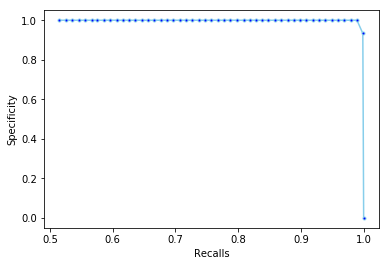

In [11]:
plt.plot(CONT_recalls_IF_Shuttle, CONT_specificity_IF_Shuttle,  "g-", marker='.', markerfacecolor='blue', markersize=6, color='skyblue')
plt.xlabel('Recalls')
plt.ylabel('Specificity')
#plt.title("Execution time of IsolationForest applied on Shuttle (in second)")
#plt.legend(loc="best")
#plt.savefig('contamination_cputime.png')
plt.show()

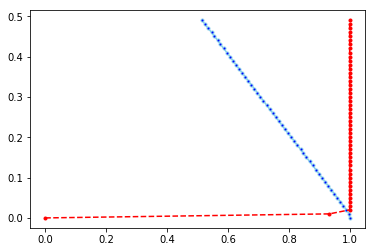

In [12]:
plt.plot(CONT_recalls_IF_Shuttle, np.arange(0., 0.5, 0.01),  "g-", marker='.', markerfacecolor='blue', markersize=6, color='skyblue')
plt.plot(CONT_specificity_IF_Shuttle, np.arange(0., 0.5, 0.01),  "r--", marker='.', markerfacecolor='red', markersize=6)
#plt.xlabel('Recalls')
#plt.ylabel('Specificity')
#plt.title("Execution time of IsolationForest applied on Shuttle (in second)")
#plt.legend(loc="best")
#plt.savefig('contamination_cputime.png')
plt.show()